<div class="alert alert-block alert-info">


# H1<b>Исследование продаж игровых приставок для интернет-магазина "Стримчик".</b>

<b>Цель проекта:</b>
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>Заказчик:</b>
Интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.    

<b>Описание данных:</b>
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Этапы исследования:</b>

Откройте файл с данными и изучите общую информацию

Подготовка данных

2.1. Замените названия столбцов;

2.2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

2.3. Обработайте пропуски при необходимости:

2.3.1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

2.3.2. Опишите причины, которые могли привести к пропускам;

2.3.3. Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

Исследовательский анализ данных

3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

3.2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3.3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

3.4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ;

3.5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат;

3.6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы;

Составление портрета пользователя каждого региона, Определите для пользователя каждого региона (NA, EU, JP):

4.1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

4.2. Самые популярные жанры (топ-5). Поясните разницу.

4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверка гипотез

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

5.3. Как вы сформулировали нулевую и альтернативную гипотезы;

5.4. Какой критерий применили для проверки гипотез и почему;

Общий вывод


<b>Название столбцов:</b>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
dt = pd.read_csv('/datasets/games.csv')

In [3]:
dt.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">
По общей информации видно, что всего строк 16 715, столбцов - 11, есть пропуски в Name,Year_of_Release, Genre, Critic_Score, User_Score и Rating. Вижу, что год релиза в формате object, нужно будет перевести в целое число. 

In [5]:
#заменю название столбцов (приведу к нижнему регистру)
dt.rename(columns={
    'Name': 'name', 
    'Platform': 'platform', 
    'Year_of_Release': 'year_of_release', 
    'Genre': 'genre', 
    'NA_sales': 'na_sales', 
    'EU_sales': 'eu_sales', 
    'JP_sales': 'jp_sales', 
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score', 
    'User_Score': 'user_score',
    'Rating': 'rating'
}, inplace=True)
dt.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Также названия столбцов можно привести в нижнему регистру, если к `df.columns` применить метод `str.lower`</div>

```python

                                    df.columns = df.columns.str.lower()
    
```

In [6]:
#считаю пропуски в Year_of_Release - год выпуска
dt.isnull().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64


Анализ пропущенных значений:
    
-critic_score и  user_score - оценка критиков и оценка пользователей находятся в топ3 по кол-ву пропусков. Причина пропусков, скорее всего, что пользователь не захотел оценивать игру или еще не успел этого сделать, т.к. еще не завершил ее.
В этих пропусках замену сделаем медиаоной;

-rating - рейтинг от организации ESRB также имеет значительное кол-во проусков, но заменить их корректно не получится, поэтому, придется, проставить значение -1;

-столбец year_of_release - год выпуска имеет незначительное кол-во пропусков, поэтому можно удалить. Причина пропусков, скорее всего, случайна или с незнанием;

-в столбце name хранится название игры, которое может отсутвовть по причине отсутвия самого названия;

-столбец genre - жанр имеет 2 пропуска, которые можно удалить. Причина пропусков связана с незнание или отсутвием конкретного жанра у игры.


In [7]:
#удаляю пропуски с незначительным кол-ом: year_of_release, name, genre:
dt.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)

In [8]:
#замена типа данных в Year_of_Release - год выпуска, чтобы убрать ноль после запятой
dt['year_of_release'] = dt['year_of_release'].astype('int')

In [9]:
#проверяю уникальные значения в столбцац с пропусками
display(dt['critic_score'].unique())
display(dt['rating'].unique())
display(dt['user_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В ячейке user_score (оценка пользователей) есть пропуски со значением tbd -to be discussed, т.е. неизвестное, вероятнее всего, связанные с отсутвием самой оценки, поэтому попробуем заменить данные на NaN

In [10]:
# для замены tbd на non применю логическую индексацию
dt.loc[dt['user_score']=='tbd', 'user_score'] = float('nan')
#dt['user_score'].unique()

In [11]:
#теперь можно заменить тип данных в user_score с object на float
dt['user_score'] = dt['user_score'].astype('float')
#dt.info()

In [12]:
dt.isnull().sum().sort_values(ascending=False)

user_score         8981
critic_score       8461
rating             6676
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [13]:
#заменю пропуски в critic_score и user_score медианым значеним:
#dt['critic_score'] = dt['critic_score'].fillna(-1)
#dt['user_score'] = dt['user_score'].fillna(-1)
#заменю пропуски в rating на -1:
dt['rating'] = dt['rating'].fillna('unknown')
#проверю кол-во пропусков:
dt.isnull().sum().sort_values(ascending=False)

user_score         8981
critic_score       8461
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

In [14]:
#посчитаю суммарные продажи во всех регионах
dt['total_sales'] = dt['na_sales'] + dt['eu_sales'] + dt['jp_sales']
dt.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,30.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,29.68
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,27.84



Тут можно использовать метод `DataFrame.sum` с аргументом `axis=1`</div>

```python

        df['total_sum'] = df[['value_1', 'value_2', 'value_3']].sum(axis=1)
    
```

Шаг 3

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. 

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. 

Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 1.0, 'Выпуск игр по годам')

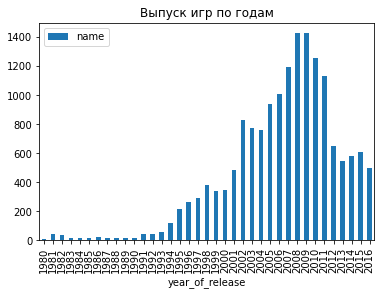

In [15]:
#Посмотрю сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
#создам сводную таблицу total_sales по годам year_of_release и построим по ней график:
dt.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar')
plt.title('Выпуск игр по годам')

<div class="alert alert-block alert-info">
Убрала sort_values(by='name')

По графику видно, что данные важны начиная с 1994 года. До этого выпуск игр был совсм незначительный

Text(0, 0.5, 'Количество продаж')

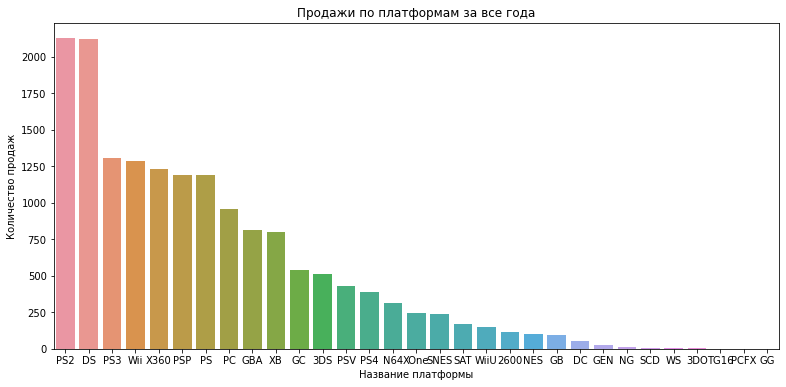

In [16]:
#Посмотрю, как менялись продажи по платформам. 
sales_in_platform = dt.pivot_table(index='platform', values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sales_in_platform.index,y=sales_in_platform['total_sales'])
plt.title("Продажи по платформам за все года")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, DS, PS3, WII, X360, PS3, PS, GBA, XB

In [17]:
#Построим график продаж по годам по пополуярным платформам
#для этого можно выделить топ10 платформ по количеству продаж:
top_platforms = sales_in_platform.head(10).reset_index()
#top_platforms
#создам словарь с пополярными платформами:
top_platforms_dict = top_platforms['platform'].unique()
top_platforms_dict

array(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB'],
      dtype=object)

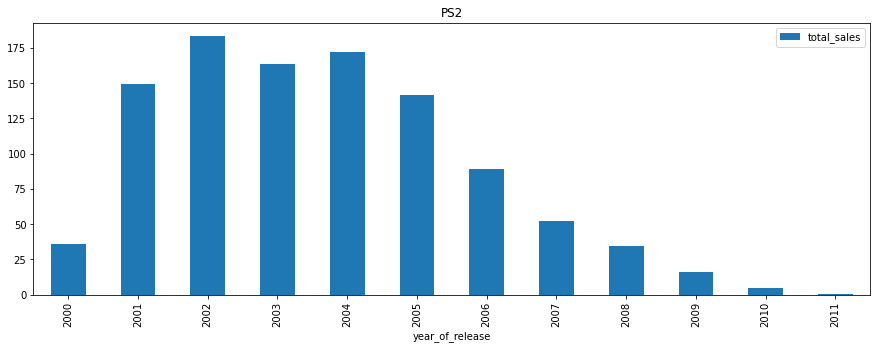

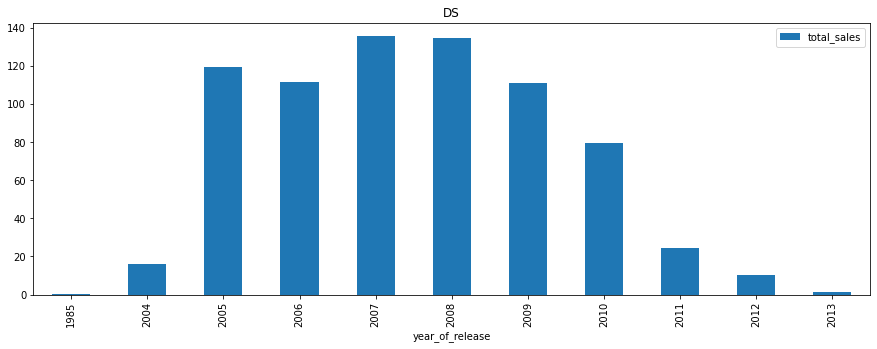

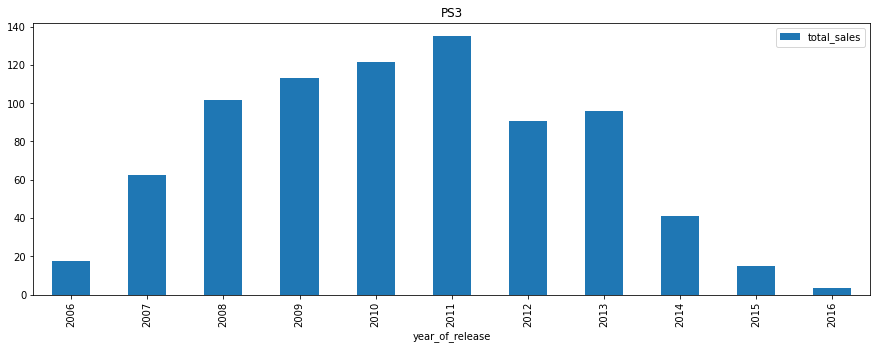

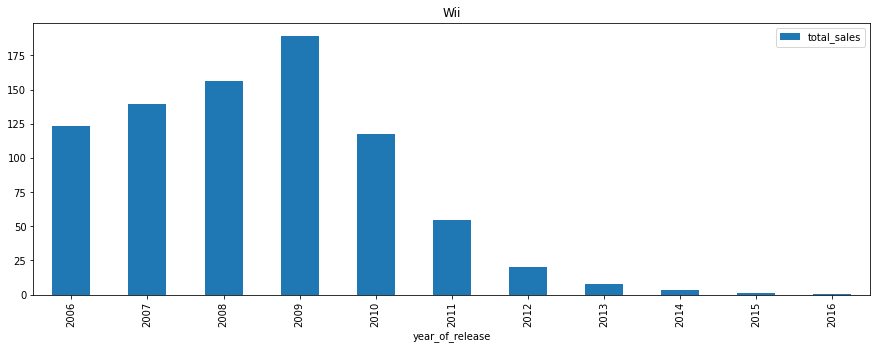

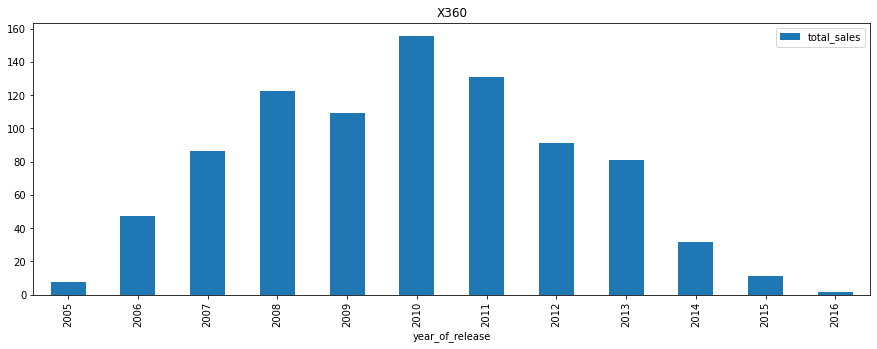

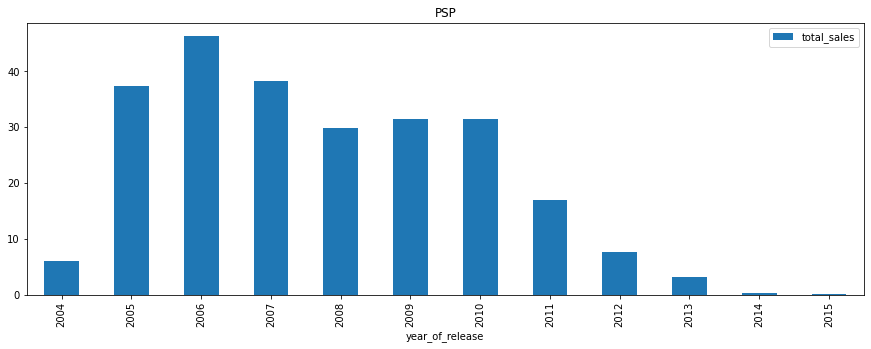

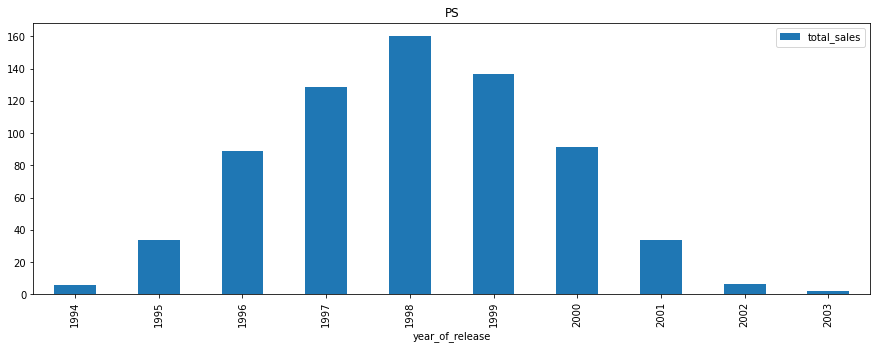

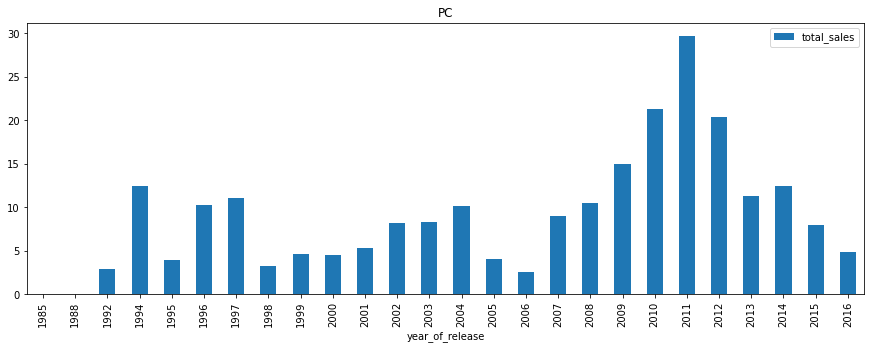

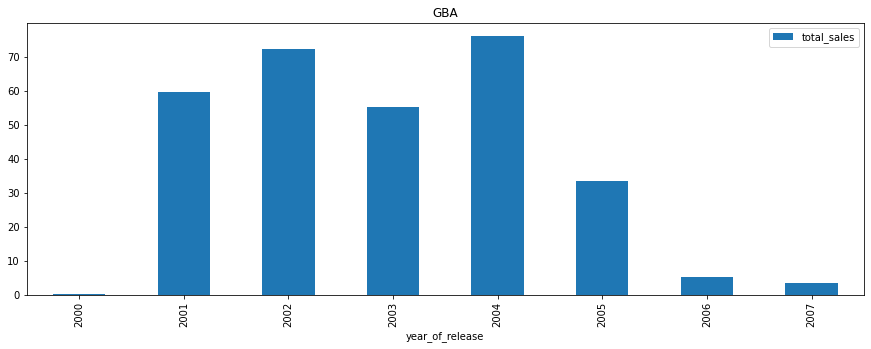

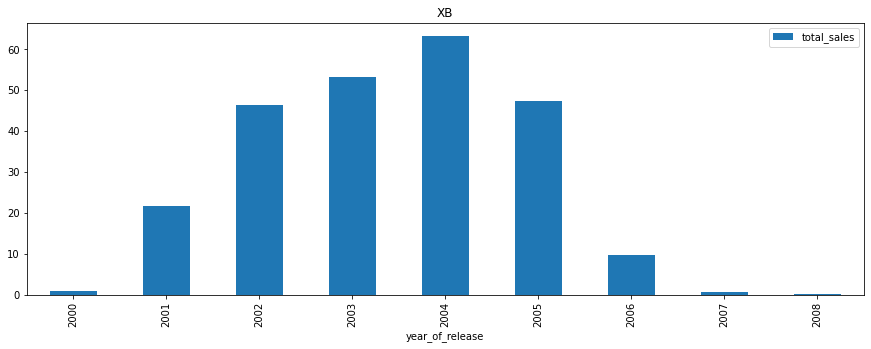

In [18]:
#Построю график продаж по годам по пополуярным платформам
for platform in top_platforms_dict:
    dt[dt['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)

По графикам видно, что платформы в среднем существуют 10 лет, пик продаж в основном приходится на 5-год запуска и постепенно снижается.
Общий период продаж у всех платформ примерно с 2006 по 2016 год - актуальный период.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

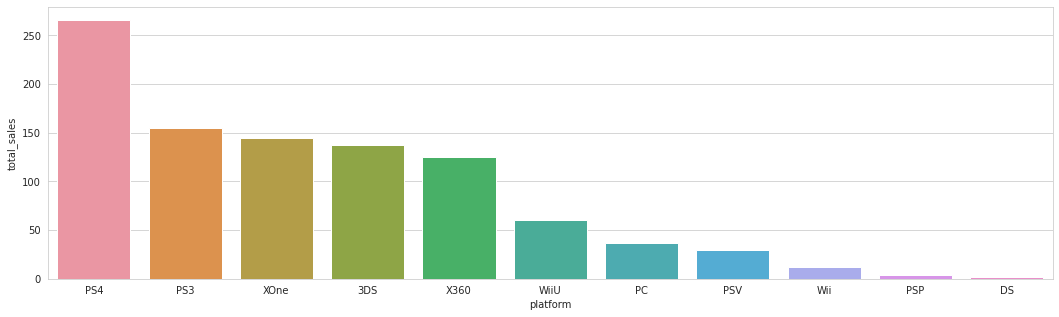

In [19]:
#Какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.
#сделаю срез данных после 2013 года:
actual_period = dt.query('year_of_release >= 2013') 

#сравню платформы по сумме продаж:
the_best_platform = actual_period.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = the_best_platform, x='platform', y='total_sales')

<div class="alert alert-block alert-info">
Наиболее прибыльные платформы - PS4, PS3, XOne, 3DS, X360, WiiU - растущие плафтормы

<div class="alert alert-block alert-info">
Построила по the_best_platform

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

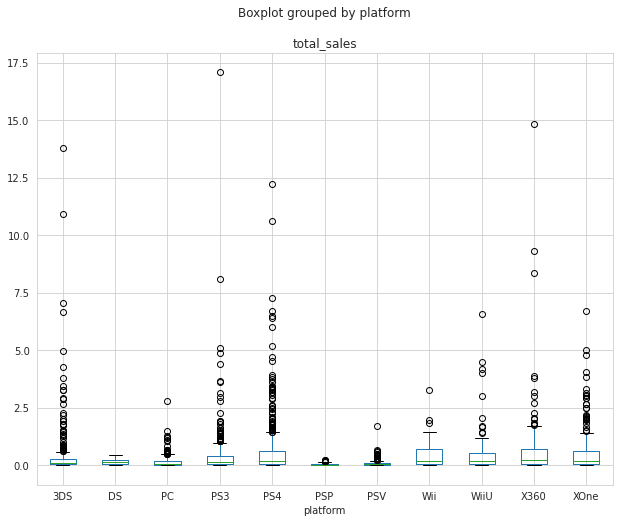

In [20]:
#строю график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
actual_period.boxplot(by='platform', column='total_sales', figsize=(10,8))

Медианные значения не сильно различаются. Самые большие выбросы у WiiU. Самые крупные продажи у GBA, PS3, X360 и XOne.

<div class="alert alert-block alert-warning">
<b>🔁Что можно добавить:</b> 
    
Диаграммы получились не очень информативными.
    
Чтобы отчетливо их рассмотреть можно расположить диаграммы горизонтально и немного ограничить ось со значениями продаж (пример ниже). Для визуализации мне больше нравится библиотека seaborn. Есть [отличная статья](https://habr.com/ru/post/468295/), где показаны различные способы визуализации. Может быть тебе пригодится)</div>

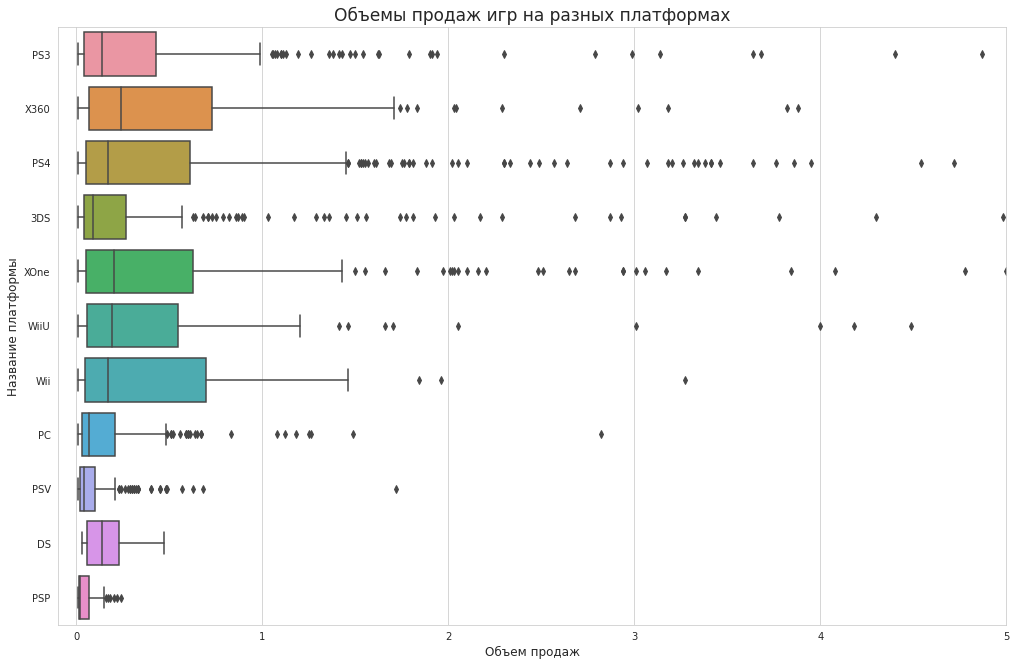

In [21]:
# код ревьюера
plt.figure(figsize=(17, 11))
sns.boxplot(data=actual_period, y='platform', x='total_sales')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

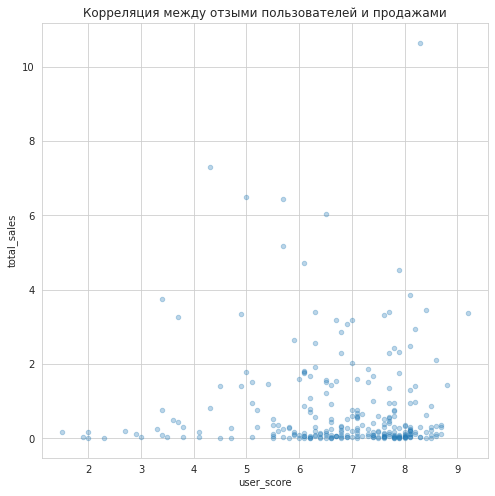

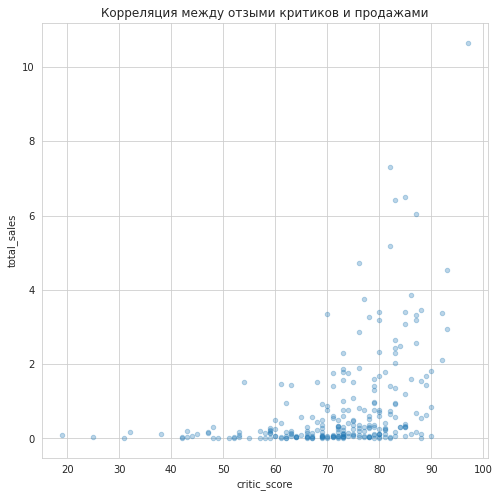

In [22]:
# выведу таблицу рассеивания по платформе PS3, отобразив отзывы пользователей:
dt[dt['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.title('Корреляция между отзыми пользователей и продажами')
plt.show()
# выведу таблицу рассеивания по платформе PS3, отобразив отзывы критиков:
dt[dt['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.title('Корреляция между отзыми критиков и продажами')
plt.show()

In [23]:
# вычислю корреляцию между продажами и отзывам пользователей:
dt_ps4 = dt[dt['platform']=='PS4']
dt_ps4_cor = dt_ps4['user_score'].corr(dt_ps4['total_sales'])
display('Корреляция слабо положительная: {}'.format(dt_ps4_cor))

'Корреляция слабо положительная: -0.03126053686666919'

In [24]:
# вычислю корреляционную матрицу, диапазон элементов которой равен [-1, 1], по умолчанию она использует коэффициент корреляции Пирсона. sns.heatmap -это просто способ показать с помощью цветов, насколько сильны корреляции, где зеленый цвет в данном случае предполагает положительную корреляцию, близкую к 1 .
#dt_ps4_1 = dt[dt['platform']=='PS4']
#создам выгрузку без заглушек
dt_without_user = dt_ps4[dt_ps4['user_score'] != -1]
dt_without_user_cor = dt_without_user['user_score'].corr(dt_without_user['total_sales'])
display('Корреляция слабо отрицательная: {}'.format(dt_without_user_cor))

'Корреляция слабо отрицательная: -0.03126053686666919'

<div class="alert alert-block alert-warning">
Коэффициенты выше получились одинаковыми. В оценках пользователей нет значений -1</div>

In [25]:
# вычислю корреляцию между продажами и отзывам критиков:
dt_ps4_cor = dt_ps4['critic_score'].corr(dt_ps4['total_sales'])
display('Корреляция слабо положительная: {}'.format(dt_ps4_cor))

'Корреляция слабо положительная: 0.4058867746520127'

Отзывы пользователей не влияют на продажи, отзывы критиков имеют слабое влияние на продажи.
Сравним эти выводы с другими платформами.


PS3:
Коэффициент корреляции user_score и total_sales: 0.0
Коэффициент корреляции critic_score и total_sales: 0.34

X360:
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.35

Wii:
Коэффициент корреляции user_score и total_sales: 0.68
Коэффициент корреляции critic_score и total_sales: nan

PSP:
Коэффициент корреляции user_score и total_sales: nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Коэффициент корреляции critic_score и total_sales: nan


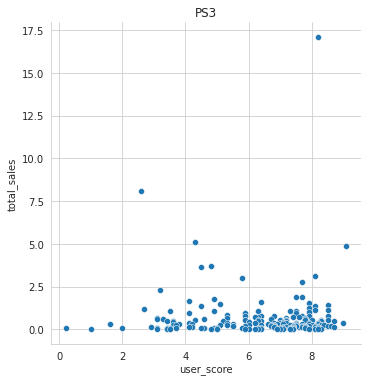

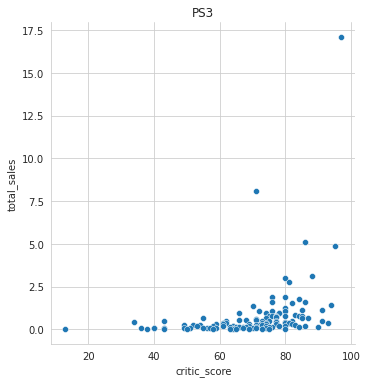

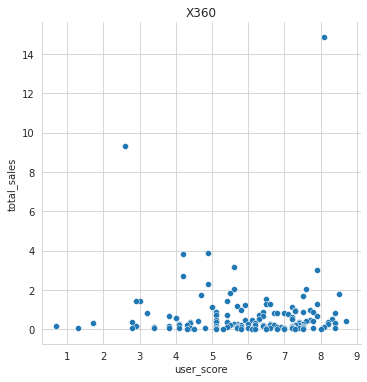

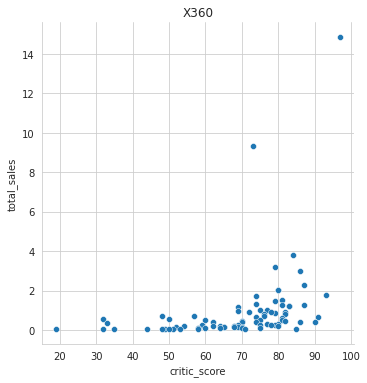

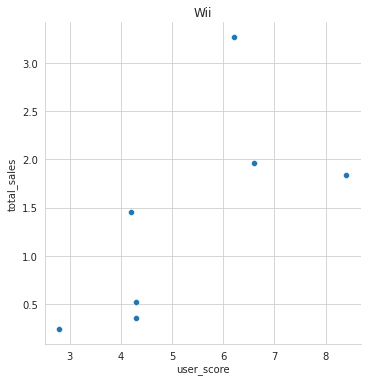

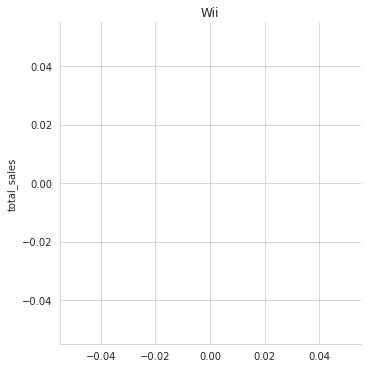

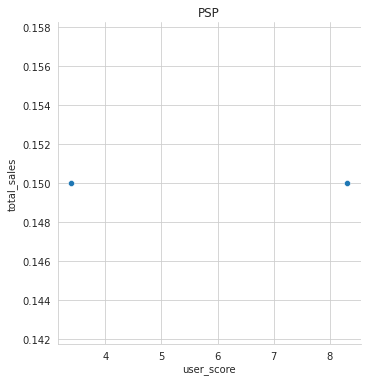

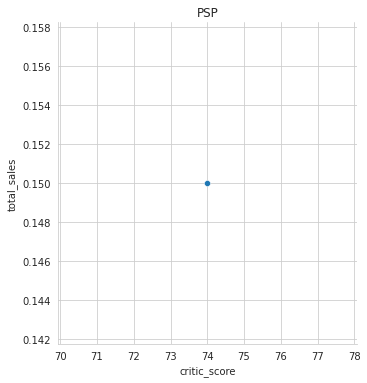

In [26]:
# посчитаю коэффициент корреляции для отзывов пользователей и критиков относительно объема продаж
# и построю корреляционную диаграмму
for platform in ['PS3', 'X360', 'Wii', 'PSP']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = actual_period.query('platform == @platform and (user_score != -1) and (critic_score != -1)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column].corr(temp['total_sales']), 2)))
        sns.relplot(x=column, y="total_sales", data=temp)
        _ = plt.title(platform)

Выводы похожи, наблюдается слабое влияение отызвов критиков на продажи и отсутсвует влияние отзывов пользователей.

<div class="alert alert-block alert-success">
Вывод по влиянию оценок на продажи верный  </div>

In [27]:
#Посмотрим на общее распределение игр по жанрам. 
#Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
genre_sales = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,284.67
Shooter,204.21
Role-Playing,134.41
Sports,131.20
Misc,56.73
Platform,38.51
Racing,35.45
Fighting,31.75
Adventure,21.21


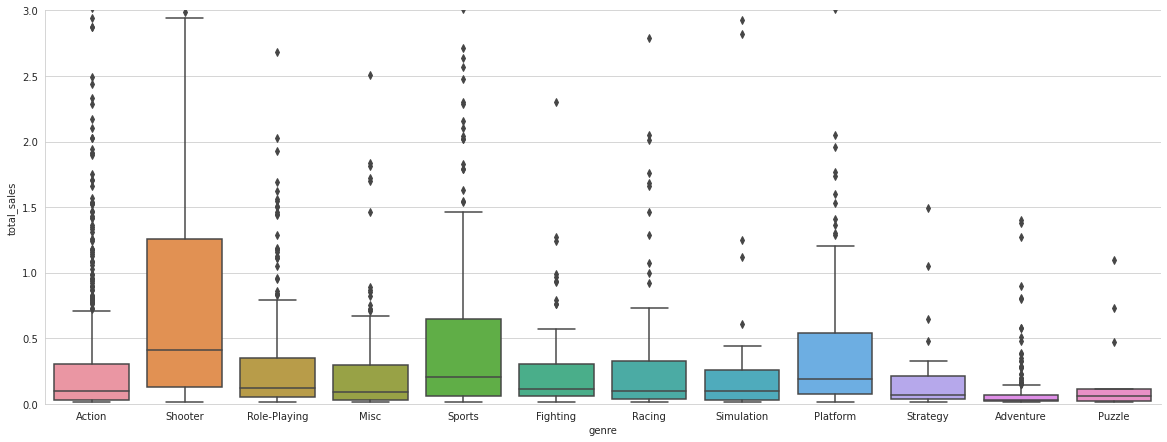

In [28]:
sns.catplot(x='genre', y="total_sales", kind="box", data=actual_period, height=6, aspect=2.7)
_ = plt.ylim(0, 3)

Самые высокие средние продажи у жанра Shooter, самые низкие продажи у Приключения и Пазл

In [29]:
#Выделяются ли жанры с высокими и низкими продажами?
dt.pivot_table(index=['name', 'genre'], values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,,total_sales
name,genre,
Wii Sports,Sports,74.09
Grand Theft Auto V,Action,48.68
Super Mario Bros.,Platform,44.32
Tetris,Puzzle,35.15
Mario Kart Wii,Racing,32.23
Pokemon Red/Pokemon Blue,Role-Playing,30.38
Wii Sports Resort,Sports,29.82
Duck Hunt,Shooter,27.84
Call of Duty: Modern Warfare 3,Shooter,27.31


Cамая продаваемая игра из жанра sports. А игра Duck Hunt в жанре Shooter на 10-ом месте

<div class="alert alert-block alert-info">
Самыми прибыльными жанрами являются Sports, Shooter и Platform

Шаг 4. 
Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

1. Самые популярные платформы топ-5

In [30]:
#самые популярные платформы в Америке
na_popular_platforms = actual_period.groupby('platform').na_sales.mean().sort_values(ascending=False)[:5]
na_popular_platforms

platform
X360    0.439032
XOne    0.377004
Wii     0.285217
PS4     0.277398
WiiU    0.254000
Name: na_sales, dtype: float64

In [31]:
#Самые популярные платформы в Европе:
eu_popular_platforms = actual_period.groupby('platform').eu_sales.mean().sort_values(ascending=False)[:5]
eu_popular_platforms 

platform
PS4     0.359923
Wii     0.257826
X360    0.228602
XOne    0.208866
PS3     0.196551
Name: eu_sales, dtype: float64

In [32]:
#Самые популярные платформы в Японии:
jp_popular_platforms = actual_period.groupby('platform').jp_sales.mean().sort_values(ascending=False)[:5]
jp_popular_platforms

platform
3DS     0.223795
WiiU    0.094609
PS3     0.067681
PSV     0.051927
PSP     0.049104
Name: jp_sales, dtype: float64

In [33]:
#Создам общую сводную таблицу популярных платформ по всех регионов:
data_to_plot = pd.DataFrame(data=[na_popular_platforms,eu_popular_platforms, jp_popular_platforms]).T
data_to_plot

,na_sales,eu_sales,jp_sales
platform,,,
X360,0.439032,0.228602,NaN
XOne,0.377004,0.208866,NaN
Wii,0.285217,0.257826,NaN
PS4,0.277398,0.359923,NaN
WiiU,0.254000,NaN,0.094609
PS3,NaN,0.196551,0.067681
3DS,NaN,NaN,0.223795
PSV,NaN,NaN,0.051927
PSP,NaN,NaN,0.049104


<AxesSubplot:xlabel='platform'>

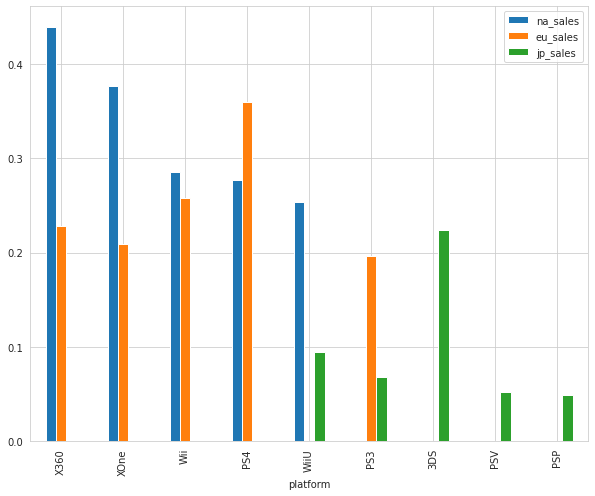

In [34]:
#построю график поплярных платформ по регионам:
data_to_plot.plot(kind='bar',figsize=(10,8))

В Японии X360, Wii, Xone и Ps4 не пользуются спросом, в то время как, ка в Америке и Европе данные платформы явно в фаворитах у пользователей. PS3-единственная платформа предствленная во всех 3-х регионах.

2.Самые популярные жанры (топ-5)

In [35]:
#Самые популярные жанры в Америке:
na_popular_genres = actual_period.groupby('genre').na_sales.mean().sort_values(ascending=False)[:5]
na_popular_genres

genre
Shooter     0.586845
Sports      0.305000
Platform    0.245135
Fighting    0.194375
Misc        0.177355
Name: na_sales, dtype: float64

In [36]:
#Самые популярные жанры в Европе:
eu_popular_genres = actual_period.groupby('genre').eu_sales.mean().sort_values(ascending=False)[:5]
eu_popular_genres 

genre
Shooter       0.469840
Sports        0.282804
Racing        0.237529
Platform      0.210541
Simulation    0.176129
Name: eu_sales, dtype: float64

In [37]:
#Самые популярные жанры в Японии:
jp_popular_genres = actual_period.groupby('genre').jp_sales.mean().sort_values(ascending=False)[:5]
jp_popular_genres

genre
Role-Playing    0.174795
Fighting        0.095625
Simulation      0.072903
Puzzle          0.069412
Platform        0.064730
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='genre'>

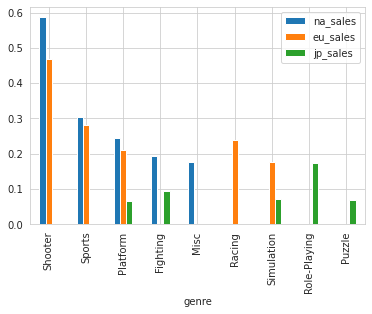

In [38]:
#Построю график популярных жанров в трех регоинах:
data_to_plot = pd.DataFrame(data=[na_popular_genres,eu_popular_genres, jp_popular_genres]).T
data_to_plot.plot(kind='bar')

 в Японии игры в жанре Shooter, Sports и Racing совсем не пользуются популярностью. В Америке и Европе лидерирует Shooter. 

3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
#Влияние рейтинга ESRB на продажи в Америке:
na_popular_ratings = actual_period.groupby('rating').mean().na_sales.sort_values()
na_popular_ratings 

rating
unknown    0.091525
T          0.149520
E10+       0.215238
E          0.261755
M          0.447724
Name: na_sales, dtype: float64

In [40]:
#Влияние рейтинга ESRB на продажи в Европе:
eu_popular_ratings =  dt.groupby('rating').mean().eu_sales.sort_values()
eu_popular_ratings

rating
EC         0.013750
RP         0.030000
K-A        0.090000
unknown    0.091320
E10+       0.131622
T          0.145194
E          0.179513
M          0.312500
AO         0.610000
Name: eu_sales, dtype: float64

In [41]:
#Влияние рейтинга ESRB на продажи в Японии:
jp_popular_ratings = dt.groupby('rating').mean().jp_sales.sort_values()
jp_popular_ratings

rating
AO         0.000000
EC         0.000000
RP         0.000000
E10+       0.028859
M          0.041393
E          0.050487
T          0.051876
unknown    0.125336
K-A        0.486667
Name: jp_sales, dtype: float64

<AxesSubplot:>

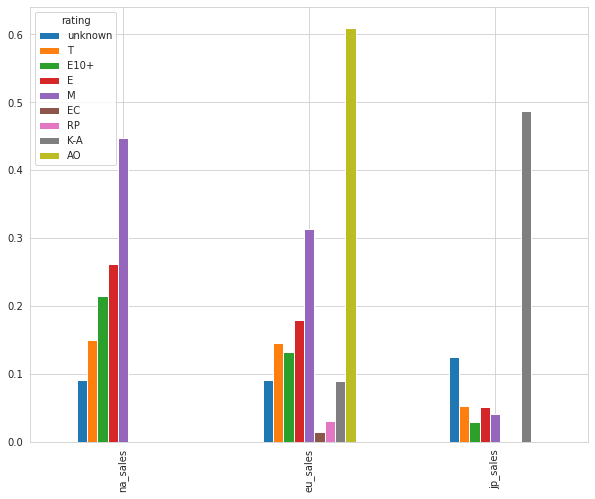

In [42]:
#построю график вляния рейтинга ESRB на продажи в регоинах:
data_to_plot = pd.DataFrame([na_popular_ratings, eu_popular_ratings, jp_popular_ratings])
data_to_plot.plot(kind='bar', figsize=(10,8))

Больше всего игр продаются со следующими рейтингами: в Америками - M (от 17 лет), в Европе - АО (от 18 лет), в Японии - К-А (детский)

В Японии у большинства игр нет рейтинга ESRB, потому что в Японии своя рейтинговая модель CERO

Шаг 5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Нулевая гипотеза: средний пользовательский рейтинг платформы Xbox One == средний пользовательский рейтинг платформы PC

Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One != средний пользовательский рейтинг платформы PC

In [43]:
xone = actual_period.query('platform == "XOne"')['user_score']
pc = actual_period.query('platform == "PC"')['user_score']

alpha = .01

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Статистический тест показал, что гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получилось отвергнуть. Т.к. в тесте сравниваются две выборки, необходимо применять t-test для проверки гипотезы.

Гипотеза №2.

Нулевая гиптеза  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

Альтернативная гипотеза  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

α=1%

In [44]:
action = actual_period.query('genre == "Action"')['user_score']
sports = actual_period.query('genre == "Sports"')['user_score']

alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
Исходная гипотеза не подтвердилась: можно утверждать, что средние пользовательские рейтинги для жанров Action и Sports различаются. 

Шаг 6. Общий вывод

Была проведена подготовка и приведение к нужному типу данных. 
В столбце user_score (оценка пользователей) пропуски со значением tbd -to be discussed были заменены на NaN

При анализе данных, можно увидеть, что попоулярность на игры стала расти с 1994 года.
Наиболее прибыльные и популярные платформы - PS4, PS3, XOne, 3DS, X360, WiiU.
Средняя продолжительность жизненного цикла приставок 10 лет.
На продажи платформ не влиюят отзывы пользователей, а отзывы критиков влияют не значительно.
Cамая продаваемая игра из жанра sport, при этом, если смотреть на все платформы, то самые высокие средние продажи у жанра Shooter, самые низкие продажи у Приключения и Пазл.

При составлении портрета каждого регоина, выяснилось, что в Японии X360, Wii, Xone и Ps4 не пользуются спросом, в то время как, как в Америке и Европе данные платформы явно в фаворитах у пользователей. PS3-единственная платформа предствленная во всех 3-х регионах. В Японии игры в жанре Shooter, Sports и Racing совсем не пользуются популярностью. В Америке и Европе лидерирует Shooter. 

Из приведенного анализа, можно сделать общий вывод, что успехом будут пользоваться игры для приставок SP4. Жанр стоит выбрать shooter.

<b>Рекомендаци по рекламной компании на 2017 год:</b>
На основе проведенного анализа, игра должна быть разработана для платформ PS4 или XOne, если речь идет о западном рынке, и — для платформы 3DS, если игру планируется продавать в Японии.
Жанр: Action или Shooter для Запада, Role-Playing — для Японии.
Рейтинг ESRB: от 17 лет (для Америки и Европы) или от 10 лет (для Японии). 
Можно не брать внимание оценки пользоталей, а вот на оценки критиков стоит учитвать.Ориентироваться на оценки пользователей нет смысла, на продажи это не оказывает существенного влияния. 